<a href="https://colab.research.google.com/github/Pravallika-Myneni/Data_science_pipeline/blob/main/pm_milestone_5_chicago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/crime_merged.csv', index_col = [0])
df.head(2)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Other Asian,Native Hawaiian and Other Pacific Islander,Native Hawaiian,Chamorro,Samoan,Other Pacific Islander,Some other race,ZipCode,Median_Income,Mean_Income
0,10224738,HY411648,09/05/2015 01:30:00 PM,043XX S WOOD ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,...,96,36,9,0,10,17,2103,60644,28033,44694
1,10224739,HY411615,09/04/2015 11:30:00 AM,008XX N CENTRAL AVE,0870,THEFT,POCKET-PICKING,CTA BUS,False,False,...,249,0,0,0,0,0,150,60661,125365,148266


In [6]:
df.columns, df.shape

(Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
        'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
        'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
        'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
        'Location', 'clean block', 'zipcode', 'Unnamed: 0.1', 'Zipcode',
        'SEX AND AGE', 'Total population', 'Male', 'Female',
        'Total population.1', 'One race', 'Two or more races', 'One race.1',
        'White', 'Black or African American',
        'American Indian and Alaska Native', 'Cherokee tribal grouping',
        'Chippewa tribal grouping', 'Navajo tribal grouping',
        'Sioux tribal grouping', 'Asian', 'Asian Indian', 'Chinese', 'Filipino',
        'Japanese', 'Korean', 'Vietnamese', 'Other Asian',
        'Native Hawaiian and Other Pacific Islander', 'Native Hawaiian',
        'Chamorro', 'Samoan', 'Other Pacific Islander', 'Some other race',
        'ZipCode', 'Median_I

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
all(df['zipcode'] == df['Zipcode'])

True

In [8]:
df_ = df[[ 'Latitude', 'Longitude', 'ID', 'Case Number' , 'Date', 'Block', 'IUCR', 'Primary Type', 'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area', 'FBI Code', 'Zipcode', 'Median_Income', 'Mean_Income']].rename(columns = {'Date' : 'DateTime'})
df_['DateTime'] = pd.to_datetime(df_['DateTime'])
df_['Date'] = df_['DateTime'].dt.date
df_.head(2)

,Latitude,Longitude,ID,Case Number,DateTime,Block,IUCR,Primary Type,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,Zipcode,Median_Income,Mean_Income,Date
0,41.815117,-87.6700,10224738,HY411648,2015-09-05 13:30:00,043XX S WOOD ST,0486,BATTERY,False,True,924,9.0,12.0,61.0,08B,60644,28033,44694,2015-09-05
1,41.895080,-87.7654,10224739,HY411615,2015-09-04 11:30:00,008XX N CENTRAL AVE,0870,THEFT,False,False,1511,15.0,29.0,25.0,06,60661,125365,148266,2015-09-04


In [9]:
df_.nunique()/df_.shape[0]

Latitude          0.215791
Longitude         0.215714
ID                1.000000
Case Number       0.999867
DateTime          0.467338
Block             0.018845
IUCR              0.000194
Primary Type      0.000019
Arrest            0.000001
Domestic          0.000001
Beat              0.000145
District          0.000012
Ward              0.000027
Community Area    0.000041
FBI Code          0.000014
Zipcode           0.000014
Median_Income     0.000014
Mean_Income       0.000014
Date              0.001498
dtype: float64

ID is the unique value here

In [10]:
df_['Arrest'].value_counts()

False    1524517
True      359594
Name: Arrest, dtype: int64

In [11]:
df_['Date'].nunique()

2823

In [12]:
df_['Date'].min(), df_['Date'].max()

(datetime.date(2015, 1, 1), datetime.date(2022, 9, 23))

In [13]:
pd.date_range(start="2015-01-01", end="2022-09-23").difference(df_.Date)

DatetimeIndex([], dtype='datetime64[ns]', freq=None)

In [14]:
df_['Date'].value_counts()

2020-05-31    1893
2017-01-01    1017
2019-01-01    1006
2016-01-01     989
2016-09-01     979
              ... 
2021-02-16     357
2019-01-30     337
2020-04-19     335
2021-01-31     332
2021-02-15     330
Name: Date, Length: 2823, dtype: int64

In [15]:
df_ = df_.rename(columns =  {col : col.replace(' ', '_') for col in df.columns if col not in ['Lat', 'Lon']})
df_['week'] = df_['DateTime'].dt.week
df_['day'] = df_['DateTime'].dt.day
df_['month'] = df_['DateTime'].dt.month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


May be before clustering, we can rank the ofns_Desc and use that as one more attribute for clustering..

we can use other attributes as well here

# Clustering into high threat - medium threat and low threat zones

In [16]:
df_['Zipcode'].nunique()

26

Clustering the 26 Zipcodes?? 

In [17]:
clustering_df = df_.copy()[['Zipcode', 'ID', 'Arrest']]
total = clustering_df.groupby(['Zipcode']).count()['ID'].to_frame().rename(columns = {'ID' : 'Total_incidents'})

In [18]:
arrest_wise = clustering_df.groupby(['Zipcode', 'Arrest']).count()['ID'].to_frame().reset_index()
arrest_true = arrest_wise[arrest_wise['Arrest']== True].drop(columns = ['Arrest']).rename(columns = {'ID': 'Arrested_true'}).set_index('Zipcode')
arrest_false = arrest_wise[arrest_wise['Arrest']== False].drop(columns = ['Arrest']).rename(columns = {'ID': 'Arrested_false'}).set_index('Zipcode')

In [19]:
crime_rate = total.merge(arrest_false,left_index=True, right_index=True, how='inner')
crime_rate = crime_rate.merge(arrest_true,left_index=True, right_index=True, how='inner')
crime_rate['arrest_rate'] = crime_rate['Arrested_true']/crime_rate['Total_incidents']
crime_rate.head(2)

,Total_incidents,Arrested_false,Arrested_true,arrest_rate
Zipcode,,,,
60302,17175,13242,3933,0.228996
60602,47145,36275,10870,0.230565


In [20]:
crime_rate['arrest_rate'].describe()

count    26.000000
mean      0.193502
std       0.043177
min       0.143947
25%       0.173942
50%       0.185312
75%       0.200758
max       0.378378
Name: arrest_rate, dtype: float64

### WHat do we want to predict??

In [21]:
clustering_df_ = crime_rate#.reset_index()

Is there a point to do this.. convert to str then encode it?? For now, assuming no

In [22]:
"""from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

clustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])

clustering_df_.head(2)"""

"from sklearn.preprocessing import LabelEncoder\n\nle = LabelEncoder()\n\nclustering_df_['Zipcode'] = le.fit_transform(clustering_df_['Zipcode'])\n\nclustering_df_.head(2)"

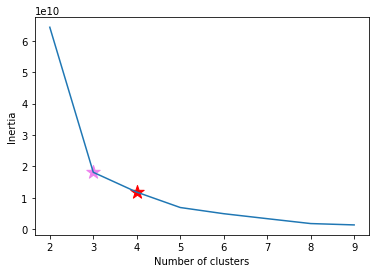

In [23]:
from sklearn.cluster import KMeans
X = np.array(clustering_df_)
inertias = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(2,10), inertias)
plt.scatter(3,inertias[1], s = 200, c = 'violet', marker='*')
plt.scatter(4,inertias[2], s = 200, c = 'red', marker='*')
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()

In [24]:
##It gives an idea of how well the objects are classified taking that number of clusters
from sklearn.metrics import silhouette_score
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score (X, preds, metric='euclidean', n_jobs=-1)
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.6863425825322977)
For n_clusters = 3, silhouette score is 0.634649597260472)
For n_clusters = 4, silhouette score is 0.5766311026564036)
For n_clusters = 5, silhouette score is 0.5260413178808472)
For n_clusters = 6, silhouette score is 0.49156750875237953)
For n_clusters = 7, silhouette score is 0.501757366316307)
For n_clusters = 8, silhouette score is 0.4502324215036933)
For n_clusters = 9, silhouette score is 0.5021815012007044)


In [28]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
pred = y_kmeans

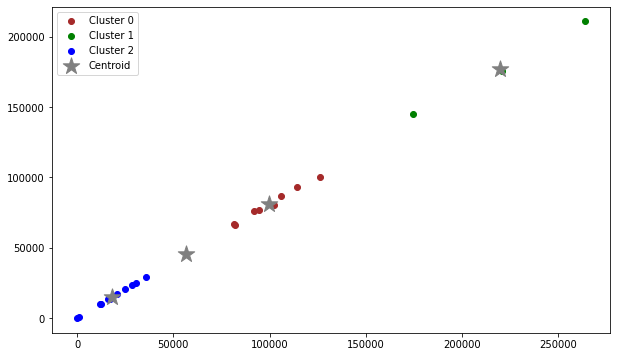

In [29]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 300, c = 'gray', label = 'Centroid', marker='*')
plt.legend()

In [30]:
clustering_df_.shape

(26, 4)

In [31]:
pred.shape

(26,)

In [32]:
clustering_df_['Label'] = pred
clustering_df_.head(5)

,Total_incidents,Arrested_false,Arrested_true,arrest_rate,Label
Zipcode,,,,,
60302,17175,13242,3933,0.228996,2
60602,47145,36275,10870,0.230565,3
60603,102511,80074,22437,0.218874,0
60604,28471,23175,5296,0.186014,2
60606,35791,29106,6685,0.186779,2


In [33]:
clustering_df_[clustering_df_['Label'] ==0].describe()

,Total_incidents,Arrested_false,Arrested_true,arrest_rate,Label
count,8.000000,8.000000,8.000000,8.000000,8.0
mean,99916.125000,80884.500000,19031.625000,0.189501,0.0
std,15524.423205,11898.540271,3989.052947,0.015756,0.0
min,81753.000000,66442.000000,14524.000000,0.172703,0.0
25%,89588.500000,73974.500000,15810.750000,0.179608,0.0
50%,98506.500000,78490.000000,18352.500000,0.184923,0.0
75%,108035.500000,88464.500000,21327.000000,0.193780,0.0
max,126355.000000,100144.000000,26211.000000,0.218874,0.0


In [34]:
clustering_df_[clustering_df_['Label'] ==1].describe()

,Total_incidents,Arrested_false,Arrested_true,arrest_rate,Label
count,3.000000,3.000000,3.000000,3.000000,3.0
mean,219509.666667,177227.000000,42282.666667,0.190372,1.0
std,44714.473209,32931.482065,12009.585102,0.019862,0.0
min,174287.000000,145092.000000,29195.000000,0.167511,1.0
25%,197415.500000,160390.000000,37025.500000,0.183864,1.0
50%,220544.000000,175688.000000,44856.000000,0.200218,1.0
75%,242121.000000,193294.500000,48826.500000,0.201803,1.0
max,263698.000000,210901.000000,52797.000000,0.203388,1.0


In [35]:
clustering_df_[clustering_df_['Label'] == 2].describe()

,Total_incidents,Arrested_false,Arrested_true,arrest_rate,Label
count,11.000000,11.000000,11.000000,11.000000,11.0
mean,18138.272727,14783.272727,3355.000000,0.197066,2.0
std,11511.866366,9330.025928,2207.783413,0.064294,0.0
min,111.000000,69.000000,42.000000,0.143947,2.0
25%,12112.000000,10206.500000,1905.500000,0.166707,2.0
50%,17175.000000,13274.000000,3505.000000,0.184609,2.0
75%,26710.500000,21759.500000,4951.000000,0.188896,2.0
max,35791.000000,29106.000000,6685.000000,0.378378,2.0


Label which is high threat .... low threat.. based on means may be?

In [36]:
all(clustering_df_.groupby(['Zipcode'])['Label'].nunique()==1)

True

In [37]:
zip_code_mapping = { row['Zipcode']: row['Label']  for i,row in clustering_df_.reset_index().iterrows()}

## After clustering

In [38]:
df_.Zipcode.nunique(), len(zip_code_mapping.keys())

(26, 26)

In [39]:
mapping_ = df_.groupby(['Zipcode'])['Latitude', 'Longitude'].agg('min').reset_index()
mapping_["Label"] = mapping_['Zipcode'].apply(lambda x: zip_code_mapping[x])
mapping_.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,Zipcode,Latitude,Longitude,Label
0,60302,41.734559,-87.845877,2.0
1,60602,41.651803,-87.906419,3.0
2,60603,41.644590,-87.939733,0.0
3,60604,41.644604,-87.903980,2.0
4,60606,41.644607,-87.901783,2.0


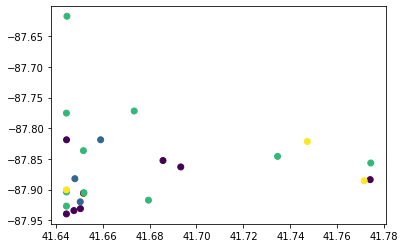

In [40]:
plt.scatter(mapping_['Latitude'], mapping_['Longitude'], c = mapping_['Label'])

## Data cleaning

In [41]:
timeseries_df = df_.copy()
timeseries_df['Threat_level']  = timeseries_df['Zipcode'].apply(lambda x: zip_code_mapping[(x)])
timeseries_df['Mean_Income'] = timeseries_df['Mean_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df['Median_Income'] = timeseries_df['Median_Income'].apply(lambda x: np.nan if x=='-' else x) 
timeseries_df.isna().sum()

Latitude          0
Longitude         0
ID                0
Case_Number       0
DateTime          0
Block             0
IUCR              0
Primary_Type      0
Arrest            0
Domestic          0
Beat              0
District          0
Ward              0
Community_Area    0
FBI_Code          0
Zipcode           0
Median_Income     0
Mean_Income       0
Date              0
week              0
day               0
month             0
Threat_level      0
dtype: int64

In [42]:
timeseries_df.shape

(1884111, 23)

## Time series?

In [43]:
timeseries_df.dtypes

Latitude                 float64
Longitude                float64
ID                         int64
Case_Number               object
DateTime          datetime64[ns]
Block                     object
IUCR                      object
Primary_Type              object
Arrest                      bool
Domestic                    bool
Beat                       int64
District                 float64
Ward                     float64
Community_Area           float64
FBI_Code                  object
Zipcode                    int64
Median_Income              int64
Mean_Income                int64
Date                      object
week                       int64
day                        int64
month                      int64
Threat_level             float64
dtype: object

In [44]:
final_ts = timeseries_df.groupby(['Date', 'Threat_level'], as_index = False).agg({ 'ID' : 'count', 'Median_Income' : 'mean', 'Mean_Income' : 'mean', 'Arrest' : 'sum'}).rename(columns = {'ID' : 'no_of_incidents'})
final_ts['Date'] = pd.to_datetime(final_ts['Date'])
final_ts['day'] = final_ts['Date'].dt.day
final_ts['Month'] = final_ts['Date'].dt.month
final_ts['Week'] = final_ts['Date'].dt.week
final_ts['dow'] = final_ts['Date'].dt.weekday

final_ts.head(2)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


,Date,Threat_level,no_of_incidents,Median_Income,Mean_Income,Arrest,day,Month,Week,dow
0,2015-01-01,0.0,354,68528.192090,95661.802260,76,1,1,1,3
1,2015-01-01,1.0,349,31156.524355,50993.813754,72,1,1,1,3


In [45]:
final_ts['Threat_level'].value_counts()

0.0    2823
1.0    2823
2.0    2823
3.0    2823
Name: Threat_level, dtype: int64

# Threat level wise timeseries

In [46]:
final_ts['Median_Income'] = final_ts['Median_Income'].apply(int)
final_ts['Mean_Income'] = final_ts['Mean_Income'].apply(int)

Should we do ts for each threat level or use threat level as a feature??

In [59]:
corr = final_ts.corr()['no_of_incidents']
list(corr[(corr>0.5) | (corr<-0.5)].index).remove('no_of_incidents')

In [87]:
threat_level_train = []
threat_level_test = []

threat_level_features = []


for threat_level in final_ts['Threat_level'].unique():

  _df = final_ts[final_ts['Threat_level'] == threat_level].drop(columns = ['Threat_level'])

  for lag in range(1,31):
    _df['Lag_'+str(lag)] = _df['no_of_incidents'].shift(lag)

  print(pd.date_range(start="2015-01-01", end="2022-09-23").difference(_df.Date))
  fig = px.line(_df, x='Date', y="no_of_incidents", title = 'Daily crimes for the threat level= '+str(threat_level))
  fig.show()

  corr = _df.corr()['no_of_incidents'].sort_values(ascending = False)
  print(corr)

  features_temp = list(corr[(corr>0.5) | (corr<-0.5)].index)
  features_temp.remove('no_of_incidents')
  threat_level_features.append(features_temp)

  _df = _df.reset_index().drop(columns = ['Date'])

  _df_train = _df.iloc[:-120]
  _df_test  = _df.iloc[-120:]

  threat_level_train.append(_df_train)
  threat_level_test.append(_df_test)




DatetimeIndex([], dtype='datetime64[ns]', freq='D')


no_of_incidents    1.000000
Lag_1              0.731165
Lag_2              0.680410
Arrest             0.678918
Lag_3              0.667493
Lag_4              0.656480
Lag_7              0.647696
Lag_5              0.638670
Lag_6              0.634457
Lag_14             0.626106
Lag_8              0.624871
Lag_9              0.611388
Lag_15             0.610020
Lag_12             0.606619
Lag_21             0.604203
Lag_10             0.603584
Lag_11             0.600913
Lag_13             0.598874
Lag_17             0.597264
Lag_16             0.593294
Lag_18             0.592084
Lag_20             0.591244
Lag_22             0.589904
Lag_19             0.585073
Lag_28             0.584329
Lag_24             0.573123
Lag_25             0.572601
Lag_29             0.566221
Lag_30             0.565537
Lag_23             0.564865
Lag_27             0.564818
Lag_26             0.560903
Median_Income      0.280811
Mean_Income        0.280446
Month              0.165876
Week               0

no_of_incidents    1.000000
Lag_1              0.713339
Arrest             0.690838
Lag_2              0.656037
Lag_7              0.627868
Lag_6              0.621776
Lag_3              0.614048
Lag_5              0.608856
Lag_14             0.607423
Lag_4              0.605799
Lag_8              0.599474
Lag_13             0.596978
Lag_15             0.595997
Lag_9              0.595698
Lag_12             0.588419
Lag_10             0.584013
Lag_11             0.581520
Lag_21             0.581002
Lag_19             0.577758
Lag_28             0.577567
Lag_16             0.575183
Lag_22             0.572328
Lag_20             0.570294
Lag_18             0.567745
Lag_17             0.565091
Lag_30             0.562989
Lag_29             0.561001
Lag_27             0.553778
Lag_23             0.547652
Lag_26             0.545981
Lag_24             0.544988
Lag_25             0.544650
Month              0.144960
Week               0.143055
dow                0.061047
Median_Income     -0

no_of_incidents    1.000000
Lag_1              0.598912
Arrest             0.514724
Lag_2              0.500248
Lag_3              0.443979
Lag_7              0.436183
Lag_6              0.431686
Lag_5              0.425536
Lag_4              0.420183
Lag_14             0.418436
Lag_28             0.414097
Lag_29             0.411746
Lag_21             0.402371
Lag_8              0.401232
Lag_13             0.398931
Lag_15             0.396554
Lag_22             0.393925
Lag_27             0.392099
Lag_20             0.390119
Lag_30             0.383476
Lag_11             0.382947
Lag_12             0.381255
Lag_26             0.380017
Lag_16             0.375982
Lag_17             0.371974
Lag_9              0.371114
Lag_10             0.369218
Lag_24             0.363164
Lag_19             0.361060
Lag_25             0.358470
Lag_18             0.356837
Lag_23             0.351446
Mean_Income        0.211839
Median_Income      0.176347
Month              0.136573
Week               0

no_of_incidents    1.000000
Arrest             0.632164
Lag_1              0.569108
Lag_2              0.535725
Lag_7              0.525176
Lag_4              0.518740
Lag_5              0.516694
Lag_6              0.514044
Lag_3              0.510733
Lag_14             0.507927
Lag_20             0.494338
Lag_22             0.493681
Lag_21             0.492608
Lag_15             0.490704
Lag_10             0.490561
Lag_16             0.486976
Lag_13             0.484326
Lag_17             0.484008
Lag_8              0.483514
Lag_11             0.482827
Lag_29             0.477684
Lag_12             0.477448
Lag_18             0.476346
Lag_28             0.475480
Lag_9              0.474407
Lag_19             0.473279
Lag_27             0.469828
Lag_25             0.469733
Lag_24             0.467620
Lag_30             0.458010
Lag_23             0.456363
Lag_26             0.456003
Median_Income      0.232117
Mean_Income        0.226083
Month              0.131986
Week               0

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [89]:
def seperate_features_target(training_data, test_data, features,  target= 'no_of_incidents'):
  #features = [feature for feature in training_data.columns if feature != target]
  
  X_train = training_data.dropna()[features]
  y_train = training_data.dropna()[target]

  X_test = test_data.dropna()[features]
  y_test = test_data.dropna()[target]

  return X_train, y_train, X_test, y_test

In [90]:
def linear_model(train, test, features):
  X_train, y_train, X_test, y_test = seperate_features_target(train, test, features)
  lr = LinearRegression()
  lr.fit(X_train, y_train)

  predict = lr.predict(X_test)

  rmse = mean_squared_error(predict, y_test)**0.5

  r_2 = r2_score(predict, y_test)


  return lr, rmse, r_2




In [91]:
for threat_level in range(3):
  lr, rmse, r_2 = linear_model(threat_level_train[threat_level], threat_level_test[threat_level], threat_level_features[threat_level])
  print('Threat_level: ', threat_level, 'RMSE: ', rmse, 'R2_score: ', r_2)

Threat_level:  0 RMSE:  31.29515670578431 R2_score:  -9.318787455656517
Threat_level:  1 RMSE:  24.83361679314686 R2_score:  -6.6135626884100915
Threat_level:  2 RMSE:  18.470559496351363 R2_score:  -2.689600151150765


In [92]:
def modelling(train, test, features, model = LinearRegression()):
  X_train, y_train, X_test, y_test = seperate_features_target(train, test, features)

  model.fit(X_train, y_train)

  predict = model.predict(X_test)

  rmse = mean_squared_error(predict, y_test)**0.5

  r_2 = r2_score(predict, y_test)


  return lr, rmse, r_2


In [93]:
models = {'Linear regression' : LinearRegression(), 'Gradient Boosting': GradientBoostingRegressor()}

for name, model in models.items():
  print('---------------', name, '------------------')

  for threat_level in range(3):
    lr, rmse, r_2 = modelling(threat_level_train[threat_level], threat_level_test[threat_level],  threat_level_features[threat_level], model )
    print('Threat_level: ', threat_level, 'RMSE: ', rmse, 'R2_score: ', r_2)

--------------- Linear regression ------------------
Threat_level:  0 RMSE:  31.29515670578431 R2_score:  -9.318787455656517
Threat_level:  1 RMSE:  24.83361679314686 R2_score:  -6.6135626884100915
Threat_level:  2 RMSE:  18.470559496351363 R2_score:  -2.689600151150765
--------------- Gradient Boosting ------------------
Threat_level:  0 RMSE:  34.052458271990155 R2_score:  -18.89538350235035
Threat_level:  1 RMSE:  26.849263302329742 R2_score:  -9.442705890716612
Threat_level:  2 RMSE:  18.994726039681197 R2_score:  -4.402070331821863
